# Probe features

- [Feature Selection in Machine Learning Book](https://www.trainindata.com/p/feature-selection-in-machine-learning-book)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from feature_engine.selection import ProbeFeatureSelection

In [2]:
# load dataset

X, y = load_breast_cancer(return_X_y=True, as_frame=True)

# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=3
)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
280,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,...,23.72,35.90,159.8,1724.0,0.1782,0.3841,0.5754,0.18720,0.3258,0.09720
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.2,1410.0,0.1234,0.2445,0.3538,0.15710,0.3206,0.06938
437,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,...,15.66,21.58,101.2,750.0,0.1195,0.1252,0.1117,0.07453,0.2725,0.07234
329,16.26,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.07981,0.1869,0.06532,...,17.73,25.21,113.7,975.2,0.1426,0.2116,0.3344,0.10470,0.2736,0.07953
201,17.54,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.07488,0.1506,0.05491,...,20.42,25.84,139.5,1239.0,0.1381,0.3420,0.3508,0.19390,0.2928,0.07867


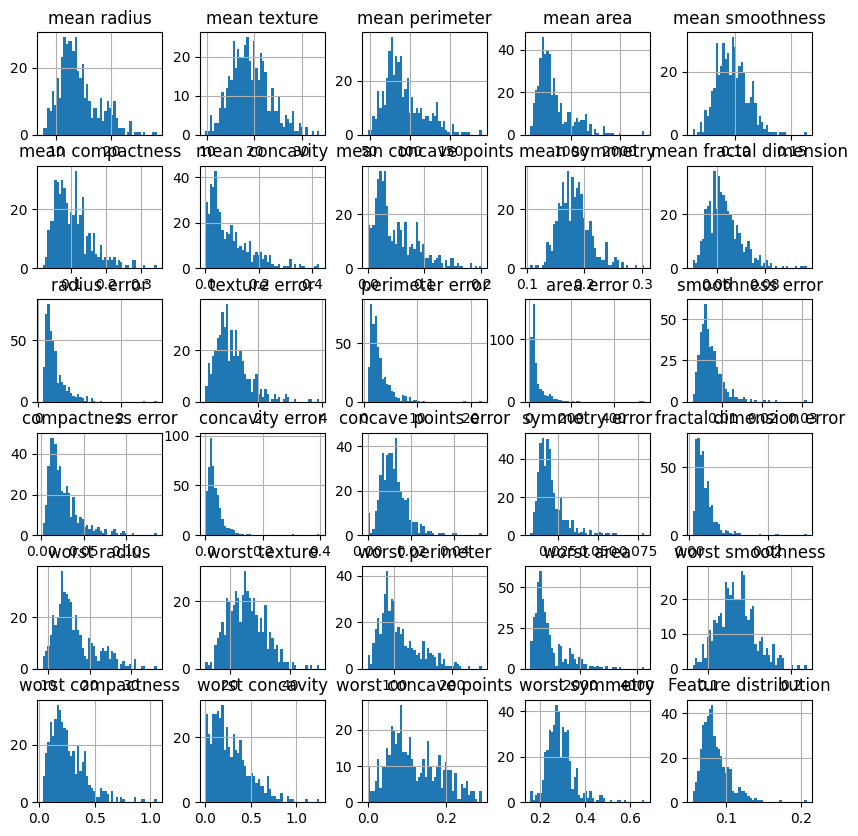

In [3]:
X_train.hist(bins=50, figsize=(10,10))
plt.title("Feature distribution")
plt.show()

## Feature-engine

In [4]:
sel = ProbeFeatureSelection(
    estimator=RandomForestClassifier(random_state=10),
    variables=None,
    scoring="precision",
    n_probes=3,
    distribution="normal",
    cv=3,
    random_state=150,
)

sel.fit(X_train, y_train)

ProbeFeatureSelection(cv=3, estimator=RandomForestClassifier(random_state=10),
                      n_probes=3, random_state=150, scoring='precision')

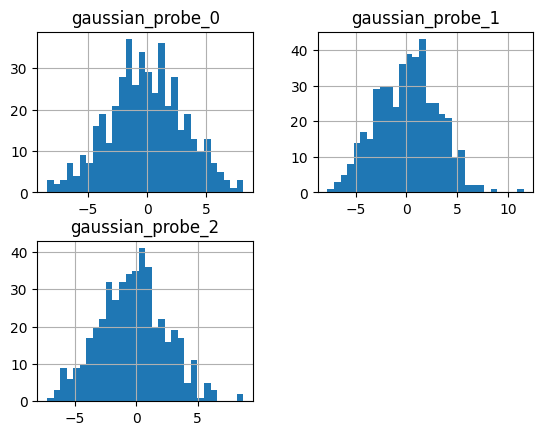

In [5]:
sel.probe_features_.hist(bins=30)
plt.title("Distribution of the probe features")
plt.show()

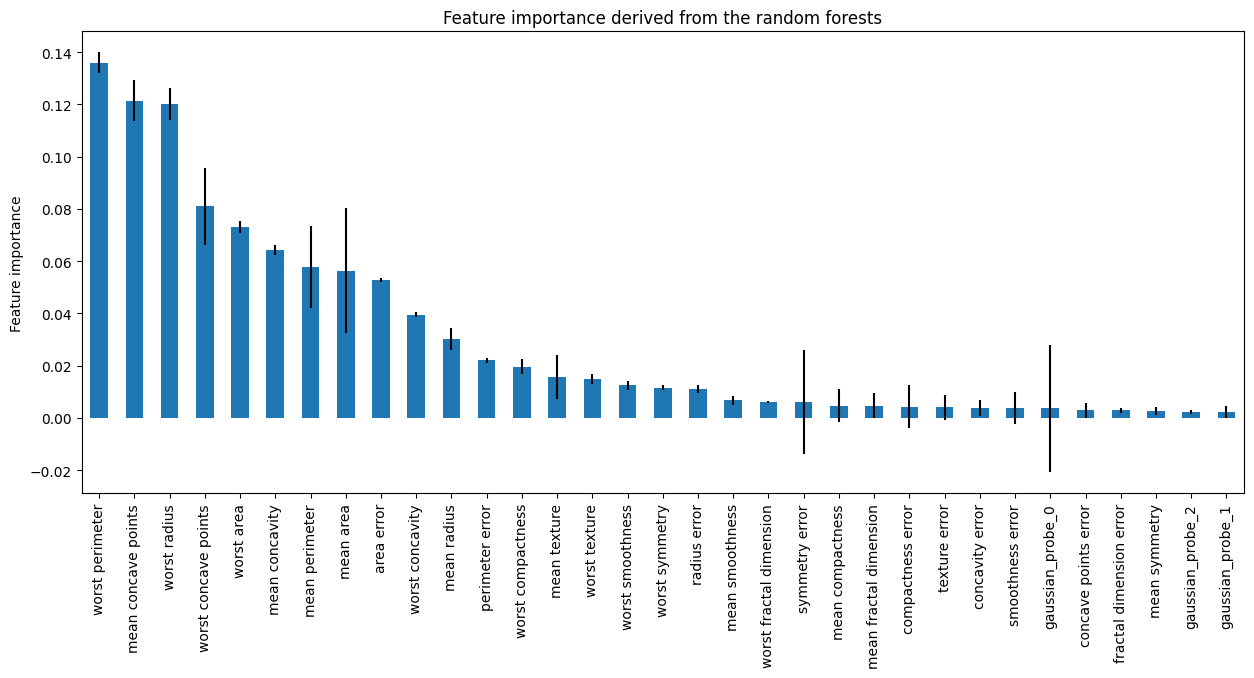

In [6]:
r = pd.concat([
    sel.feature_importances_,
    sel.feature_importances_std_
], axis=1)

r.columns = ["mean", "std"]

r.sort_values("mean", ascending=False)["mean"].plot.bar(
    yerr=[r['std'], r['std']], subplots=True, figsize=(15,6)
)
plt.title("Feature importance derived from the random forests")
plt.ylabel("Feature importance")
plt.show()

In [7]:
# the features to remove

sel.features_to_drop_

['mean symmetry']

In [8]:
# reduce dataset

X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_test_t.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean fractal dimension,radius error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
266,10.60,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.02642,0.06491,0.4505,...,11.88,22.94,78.28,424.8,0.12130,0.25150,0.19160,0.07926,0.2940,0.07587
448,14.53,19.34,94.25,659.7,0.08388,0.07800,0.088170,0.02925,0.05746,0.2535,...,16.30,28.39,108.10,830.5,0.10890,0.26490,0.37790,0.09594,0.2471,0.07463
420,11.57,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.01428,0.06267,0.2864,...,13.07,26.98,86.43,520.5,0.12490,0.19370,0.25600,0.06664,0.3035,0.08284
493,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.06013,0.3276,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
321,20.16,19.66,131.10,1274.0,0.08020,0.08564,0.115500,0.07726,0.05096,0.5925,...,23.06,23.03,150.20,1657.0,0.10540,0.15370,0.26060,0.14250,0.3055,0.05933
